In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


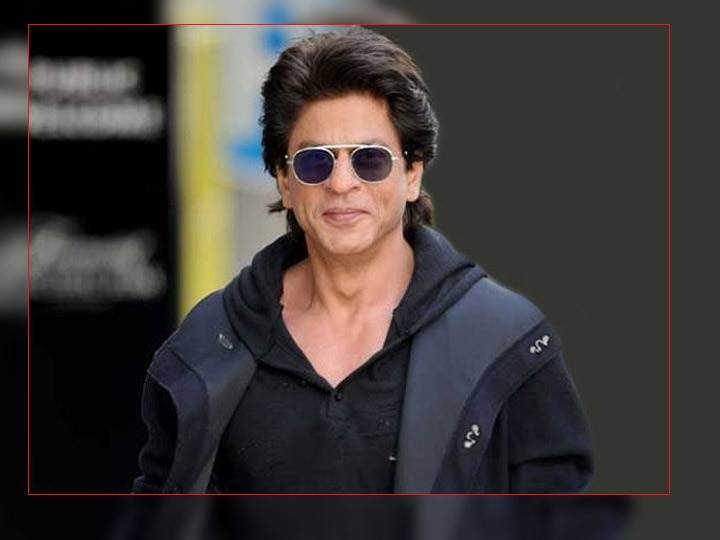

In [ ]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

#Display the image from the web using an URI.
img="https://feeds.abplive.com/onecms/images/uploaded-images/2021/10/28/e3c7e17ac7e1910e7a05f24129370d7a_original.jpg"
dp.Image(requests.get(img).content)

In [ ]:
source_img = imageio.imread(img)

In [ ]:
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

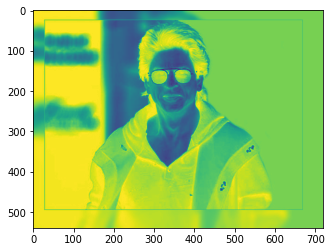

In [ ]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

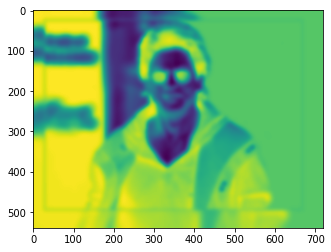

In [ ]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [ ]:
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [ ]:
target_img= dodging(blurred_img, gryscl_img)

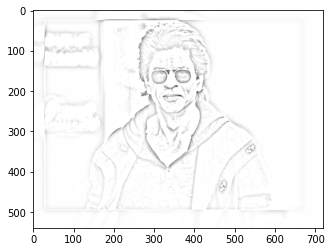

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [ ]:
#plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)